## Histograms are a great way to visualize individual color components

In [1]:
import cv2
import numpy as np
# We need to import matplotlib to create our histogram plots
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('DATA/DOGS.jpEg')

In [3]:
type(image)

numpy.ndarray

In [4]:
histogram = cv2.calcHist([image], [1], None, [256], [0, 256])

In [5]:
histogram

array([[1.202e+03],
       [9.150e+02],
       [2.148e+03],
       [4.068e+03],
       [5.449e+03],
       [5.266e+03],
       [3.930e+03],
       [3.066e+03],
       [2.465e+03],
       [1.915e+03],
       [1.681e+03],
       [1.465e+03],
       [1.467e+03],
       [1.364e+03],
       [1.385e+03],
       [1.438e+03],
       [1.450e+03],
       [1.444e+03],
       [1.628e+03],
       [1.546e+03],
       [1.622e+03],
       [1.519e+03],
       [1.578e+03],
       [1.618e+03],
       [1.649e+03],
       [1.651e+03],
       [1.671e+03],
       [1.791e+03],
       [1.891e+03],
       [2.095e+03],
       [2.197e+03],
       [2.335e+03],
       [2.241e+03],
       [2.462e+03],
       [2.563e+03],
       [2.420e+03],
       [2.554e+03],
       [2.541e+03],
       [2.574e+03],
       [2.416e+03],
       [2.620e+03],
       [2.829e+03],
       [2.832e+03],
       [3.028e+03],
       [3.153e+03],
       [3.259e+03],
       [3.358e+03],
       [3.346e+03],
       [3.418e+03],
       [3.498e+03],


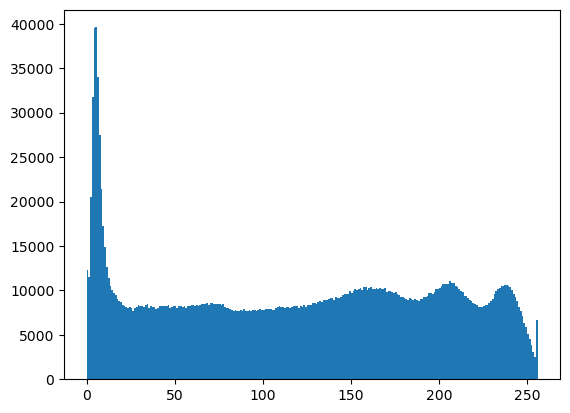

In [6]:
# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

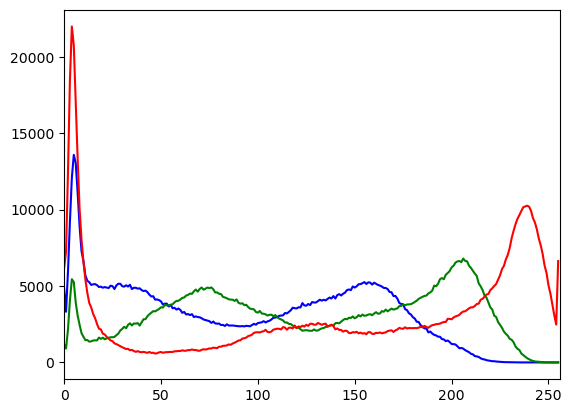

In [7]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

In [8]:
image = cv2.imread('DATA/tobago.jpg')

In [9]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

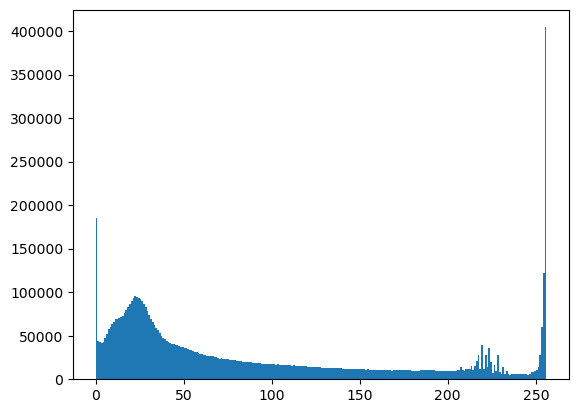

In [10]:
# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]); plt.show()

In [ ]:
# https://justpaste.it/bzf36

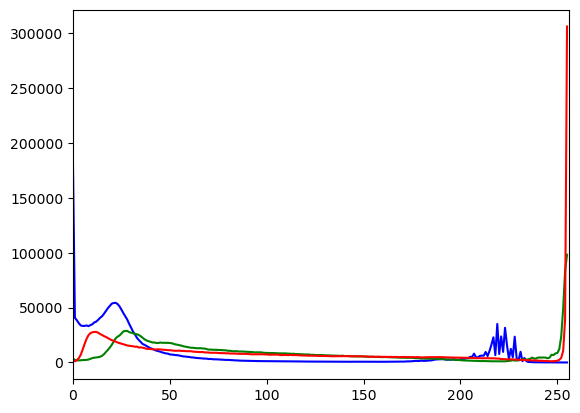

In [11]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

In [12]:
image = cv2.imread('DATA/tobago.jpg')
cv2.imshow("Tobago", image) 

cv2.waitKey(0)
cv2.destroyAllWindows()

### Masking

We can mask only certain parts of the image.

In [13]:
rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

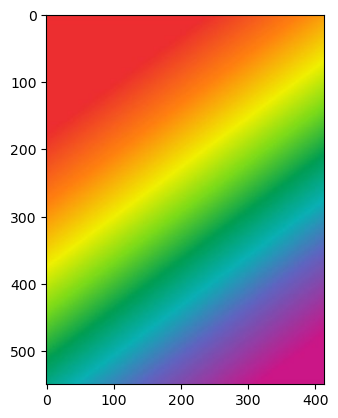

In [14]:
plt.imshow(show_rainbow)

In [ ]:
cv2.imshow("im", rainbow)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
img = rainbow

In [16]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

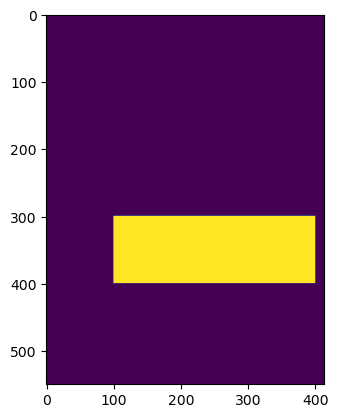

In [17]:
plt.imshow(mask)

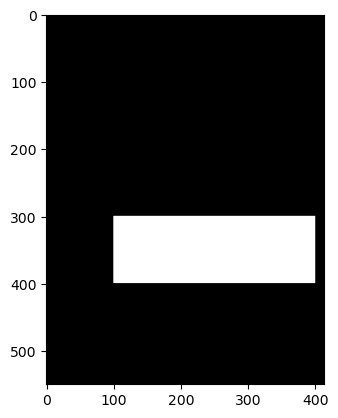

In [18]:
plt.imshow(mask, cmap='gray')

In [19]:
masked_img = cv2.bitwise_and(img, img, mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask)


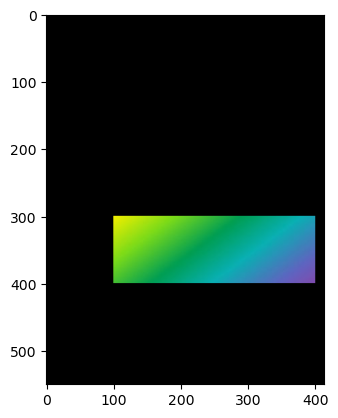

In [20]:
plt.imshow(show_masked_img)

In [21]:
hist_mask_values_red = cv2.calcHist([rainbow],
                                    channels=[2],
                                    mask=mask,histSize=[256],
                                    ranges=[0,256])

hist_full_values_red = cv2.calcHist([rainbow],channels=[2],
                                    mask=None,histSize=[256],
                                    ranges=[0,256])

Text(0.5, 1.0, 'Histogram for RED values of the full image')

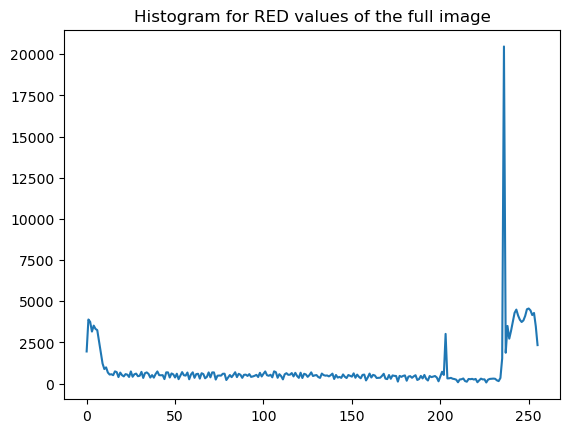

In [22]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5, 1.0, 'Histogram for RED values for the Masked Area')

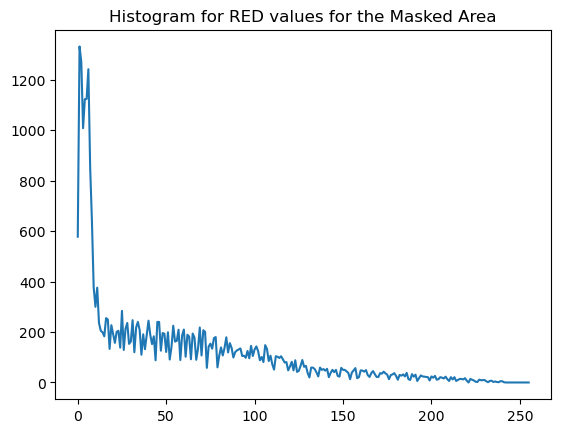

In [23]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values for the Masked Area')